In [1]:
%matplotlib inline
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import numpy as np
import cv2

import plotly
import plotly.graph_objs as graphobjs

import nibabel as nib

In [2]:
def loadCsv(path):
    """Method for getting a numpy array from the csv file"""
    points = []
    with open(path, 'r') as infile:
        for line in infile:
            line = line.strip().split(',')
            entry = [int(line[0]), int(line[1]), int(line[2]), int(line[3])]
            points.append(entry)
    points = np.array(points)
    return points

In [3]:
def array_to_plot(points, token, resolution, outfile_name=""):
    """Generates the plotly from the csv file."""
    # Type in the path to your csv file here
    
    thedata = points
#     print(thedata)

    # Set tupleResolution to resolution input parameter
    tupleResolution = resolution;

    # EG: for Aut1367, the spacing is (0.01872, 0.01872, 0.005).
    xResolution = tupleResolution[0]
    yResolution = tupleResolution[1]
    zResolution = tupleResolution[2]
    # Now, to get the mm image size, we can multiply all x, y, z
    # to get the proper mm size when plotting.
    
#     print('asdf')
#     x = [x * xResolution for x in thedata[:, 0]]
#     print(x)

    trace1 = graphobjs.Scatter3d(
        x = [x * xResolution for x in thedata[:, 0]],
        y = [x * yResolution for x in thedata[:, 1]],
        z = [x * zResolution for x in thedata[:, 2]],
        mode='markers',
        marker=dict(
            size=1.2,
            color='cyan',                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.15
        )
    )

    data = [trace1]
    layout = graphobjs.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        ),
        paper_bgcolor='rgb(0,0,0)',
        plot_bgcolor='rgb(0,0,0)'
    )

    fig = graphobjs.Figure(data=data, layout=layout)
#     print(self._token + "plotly")

    make_sure_path_exists('plots')
    
    if outfile_name == "":
        plotly.offline.plot(fig, filename= 'plots/' + token + "_plot.html")
    else:
        plotly.offline.plot(fig, filename= 'plots/' + outfile_name + "_plot.html")

In [4]:
import os
import errno

def make_sure_path_exists(path):
    """Check if the directory a file is going to be written to exists, and if not, create the directory."""
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

# Testing begins

In [8]:
# plotting no histeq
# full image
temp_file_path = "img/" + "Fear199" + ".nii"

# Downsampled image
# temp_file_path = "img/" + inToken + "_ds.nii"

# Histogram Equilized image
# temp_file_path = "histeq/" + inToken + "_histeq.nii"

num_points = 7500

temp_img = nib.load(temp_file_path)

## Sanity check for shape
temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = temp_img.get_data()
temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)




shape:
(405, 272, 537)
<class 'numpy.core.memmap.memmap'>
max:
3969


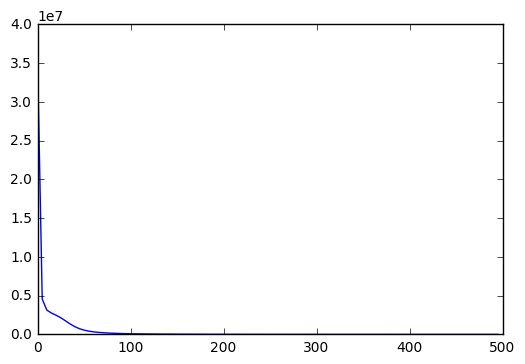

In [15]:
(values, bins) = np.histogram(temp_data, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [11]:
temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

print('shape:')
print filt.shape
print type(filt)

# print('max:')
# print(filt)

shape:
(405, 272, 537)
<class 'numpy.core.memmap.memmap'>


In [13]:
data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

In [ ]:
print('shape:')
print 
print type(filt)

In [ ]:
intens_shape = intens.shape

total_points = intens.shape[0]

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))

In [5]:
resolution = (0.01872, 0.01872, 0.005)

## Testing with downsampled img

In [22]:
# plotting no histeq
# full image
# temp_file_path = "img/" + "Fear199" + ".nii"

# Downsampled image
temp_file_path = "img/" + "Fear199" + "_ds.nii"

# Histogram Equilized image
# temp_file_path = "histeq/" + inToken + "_histeq.nii"

num_points = 7500

temp_img = nib.load(temp_file_path)

## Sanity check for shape
temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = temp_img.get_data()
temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)


shape:
(9, 6, 11)
<class 'numpy.core.memmap.memmap'>
max:
568


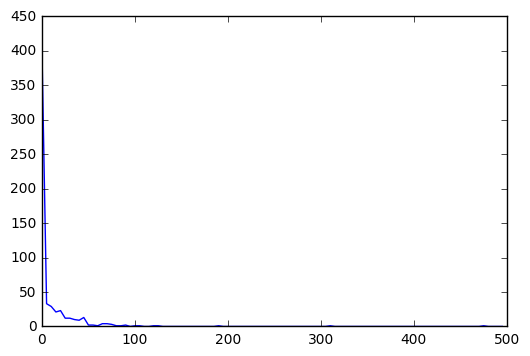

In [23]:
(values, bins) = np.histogram(temp_data, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [24]:
temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data

print('shape:')
print filt.shape
print type(filt)

# print('max:')
# print(filt)

shape:
(9, 6, 11)
<class 'numpy.core.memmap.memmap'>


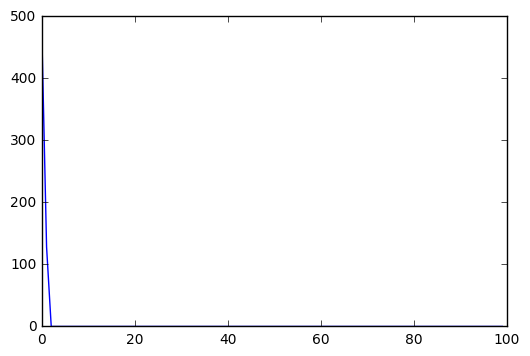

In [29]:
(values, bins) = np.histogram(filt, bins=100, range=(0,100))
plt.plot(bins[:-1], values)

In [25]:
data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

In [26]:
print('shape:')
print(intens.shape)
print type(filt)

shape:
(128,)
<class 'numpy.core.memmap.memmap'>


## hist eq testing

In [5]:
path = "img/Fear199.nii"

im = nib.load(path)

im = im.get_data()
img = im[:,:,:]

shape = im.shape
#affine = im.get_affine()

In [16]:
print(im)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 1 0 1]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 2 0 0]
  [0 0 0 ..., 0 2 0]
  ..., 
  [0 0 0 ..., 2 2 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 2 0]]

 [[0 0 0 ..., 0 3 0]
  [0 0 0 ..., 1 5 0]
  [0 0 0 ..., 1 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 1 2 0]
  [0 0 0 ..., 1 3 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


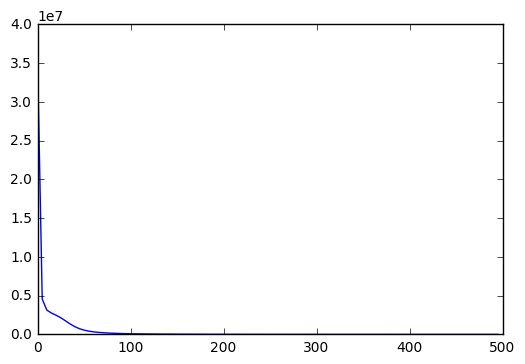

In [6]:
(values, bins) = np.histogram(im, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [23]:
print(img.shape)
print(img)

(405, 272, 537)
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 1 0 1]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 2 0 0]
  [0 0 0 ..., 0 2 0]
  ..., 
  [0 0 0 ..., 2 2 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 2 0]]

 [[0 0 0 ..., 0 3 0]
  [0 0 0 ..., 1 5 0]
  [0 0 0 ..., 1 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 1 2 0]
  [0 0 0 ..., 1 3 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [9]:
temp = img.reshape(-1)

In [11]:
print(temp)

[0 0 0 ..., 0 0 0]


In [13]:
temp2 = temp.reshape(-1)

In [14]:
print(temp2)

[0 0 0 ..., 0 0 0]


In [15]:
x_value = shape[0]
y_value = shape[1]
z_value = shape[2]

#####################################################

imgflat = img.reshape(-1)

#img_grey = np.array(imgflat * 255, dtype = np.uint8)

#img_eq = exposure.equalize_hist(img_grey)

#new_img = img_eq.reshape(x_value, y_value, z_value)
#globaleq = nib.Nifti1Image(new_img, np.eye(4))

#nb.save(globaleq, '/home/albert/Thumbo/AutAglobaleq.nii')

######################################################

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [16]:
img_grey = np.array(imgflat * 255, dtype = np.uint8)
#threshed = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)


In [17]:
print(img_grey)

[0 0 0 ..., 0 0 0]


In [ ]:
cl1 = clahe.apply(img_grey)

# DANGER
# cl2 = clahe.apply(img)


In [18]:
print(cl1)

[[3]
 [3]
 [3]
 ..., 
 [3]
 [3]
 [3]]


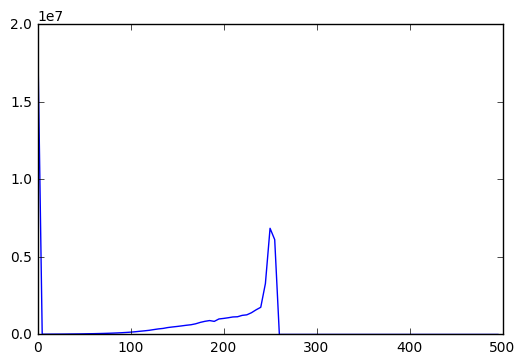

In [19]:
(values, bins) = np.histogram(cl1, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [9]:
#cv2.imwrite('clahe_2.jpg',cl1)
#cv2.startWindowThread()
#cv2.namedWindow("adaptive")
# cv2.imshow("adaptive", cl1)
#cv2.imshow("adaptive", threshed)
#plt.imshow(threshed)

# imgShow(cl1, vmax = 500


TypeError: in method 'StatisticsImageFilter_Execute', argument 2 of type 'itk::simple::Image const &'

In [20]:
localimgflat = cl1 #cl1.reshape(-1)

newer_img = localimgflat.reshape(x_value, y_value, z_value)

In [22]:
print(newer_img.shape)
print(newer_img)
# (405, 272, 537)

(405, 272, 537)
[[[  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  ..., 
  [  3   3   3 ..., 255   3 255]
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]]

 [[  3   3   3 ...,   3   3   3]
  [  3   3   3 ..., 252   3   3]
  [  3   3   3 ...,   3 252   3]
  ..., 
  [  3   3   3 ..., 252 252   3]
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3 252   3]]

 [[  3   3   3 ...,   3 249   3]
  [  3   3   3 ..., 255 244   3]
  [  3   3   3 ..., 255   3   3]
  ..., 
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ..., 255 252   3]
  [  3   3   3 ..., 255 249   3]]

 ..., 
 [[  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  ..., 
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]]

 [[  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  [  3   3   3 ...,   3   3   3]
  ..., 
  [  3   3   3 ...,   3   3   3]
  [  

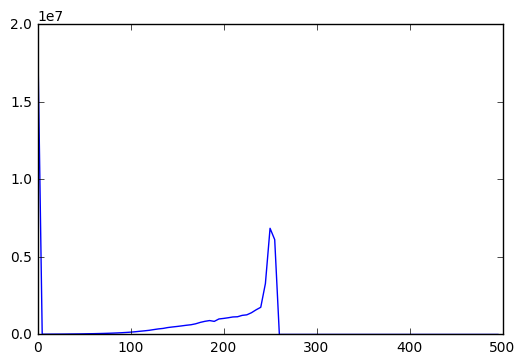

In [24]:
(values, bins) = np.histogram(newer_img, bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [51]:
localeq = nib.Nifti1Image(newer_img, np.eye(4))
dir_name = 'histeq'
make_sure_path_exists(dir_name)
nib.save(localeq, dir_name + '/' + "Fear199" + '_histeq.nii')

In [52]:
num_points = 10000

## Sanity check for shape
# temp_img.shape

## Convert into np array (or memmap in this case)
temp_data = newer_img
# temp_shape = temp_img.shape
temp_max = np.max(temp_data)

print('shape:')
print temp_data.shape
print type(temp_data)

print('max:')
print(temp_max)

# print(temp_data)

temp_threshold = 0.025
filt = temp_data > temp_threshold * temp_max
# filt = temp_data



shape:
(405, 272, 537)
<type 'numpy.ndarray'>
max:
255


In [53]:
print(temp_data.shape)

(405, 272, 537)


In [54]:
data_points = np.where(filt)
x = data_points[0]
y = data_points[1]
z = data_points[2]

intens = temp_data[filt]
intens = np.int16(255 * (np.float32(intens) / np.float32(temp_max)))

intens_shape = intens.shape

total_points = intens.shape[0]

print('total points: %d' % total_points)

fraction = num_points / float(total_points)

if fraction < 1.0:
    # np.random.random returns random floats in the half-open interval [0.0, 1.0)
    filt = np.random.random(size=intens_shape) < fraction
    print('v.shape:')
    print(intens_shape)
    print('x.size before filter: %d' % x.size)
    print('y.size before filter: %d' % y.size)
    print('z.size before filter: %d' % z.size)
    print('v.size before filter: %d' % intens.size)
    x = x[filt]
    y = y[filt]
    z = z[filt]
    intens = intens[filt]
    print('x.size after filter: %d' % x.size)
    print('y.size after filter: %d' % y.size)
    print('z.size after filter: %d' % z.size)
    print('v.size after filter: %d' % intens.size)


temp_points = np.vstack([x, y, z, intens])
temp_points = np.transpose(temp_points)
print("Num Points: %d"%(temp_points.shape[0]))



total points: 39164705
v.shape:
(39164705,)
x.size before filter: 39164705
y.size before filter: 39164705
z.size before filter: 39164705
v.size before filter: 39164705
x.size after filter: 10021
y.size after filter: 10021
z.size after filter: 10021
v.size after filter: 10021
Num Points: 10021


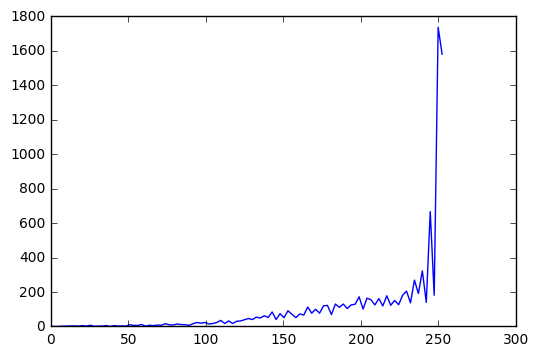

In [55]:
(values, bins) = np.histogram(temp_points[:,3], bins=100, range=(0,255))
plt.plot(bins[:-1], values)

In [56]:
resolution = (0.01872, 0.01872, 0.005)

In [57]:
seeds_hh = temp_points[temp_points[:, 3] > 250]

In [58]:
print(seeds_hh.shape)
print(seeds_hh)

(2776, 4)
[[  0  10 259 252]
 [  0 114 244 255]
 [  0 221 504 255]
 ..., 
 [382 230 176 252]
 [382 237 483 255]
 [382 271 345 252]]


In [59]:
array_to_plot(seeds_hh, "Fear199", resolution, outfile_name="Fear199_seeds_histeq_h")

In [66]:
seeds_hl = temp_points[temp_points[:, 3] < 150]

In [67]:
print(seeds_hl.shape)
print(seeds_hl)

(1004, 4)
[[ 29 138 268  97]
 [ 30 117 304 109]
 [ 32 163 274  96]
 ..., 
 [341 139 290 142]
 [342 138 334 108]
 [347 140 336 145]]


In [68]:
array_to_plot(seeds_hl, "Fear199", resolution, outfile_name="Fear199_seeds_histeq_l")